In [3]:
!pip install super-gradients

In [4]:
from super_gradients.training import models
#Retrieve the model
yolo_nas_m = models.get("yolo_nas_m", pretrained_weights="coco")

[2024-03-13 04:51:47] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-03-13 04:51:47] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-13 04:51:47] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
[2024-03-13 04:52:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


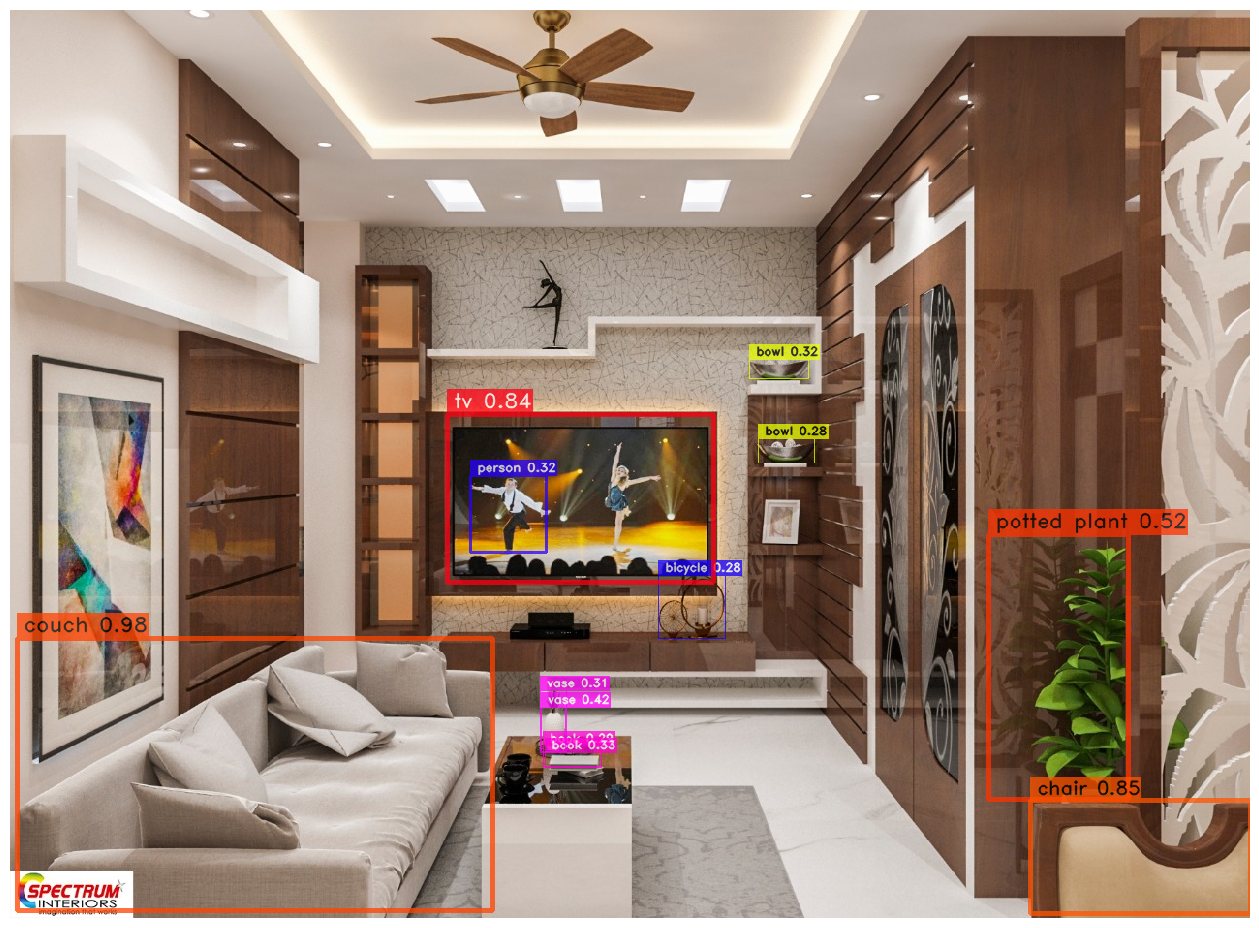

[2024-03-13 04:52:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


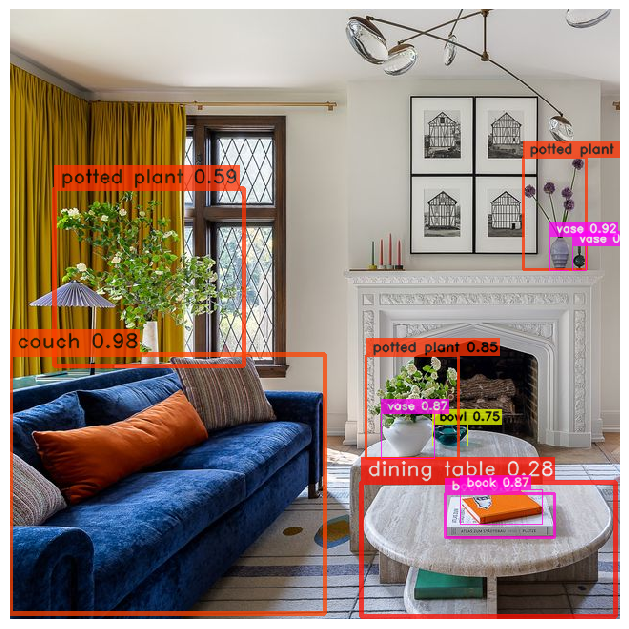

[2024-03-13 04:52:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


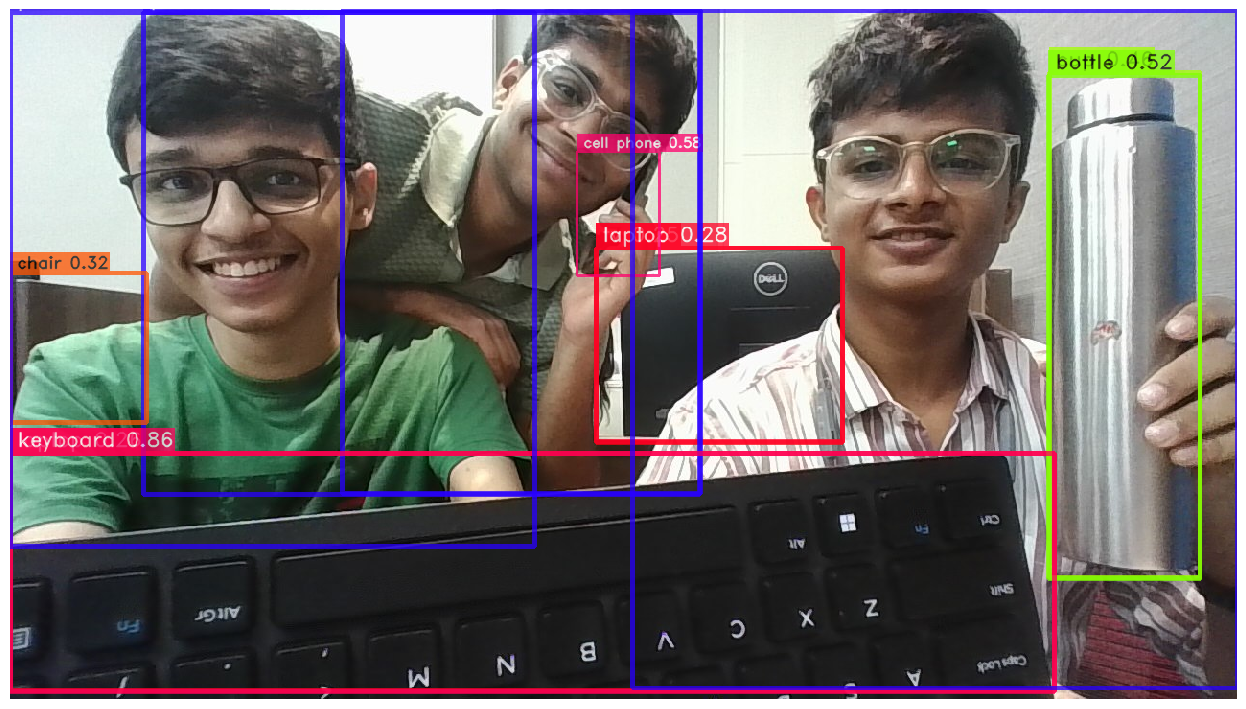

In [6]:
#Infer on an image
url = '/content/WhatsApp-Image-2021-05-20-at-19.35.10-1.jpeg'
yolo_nas_m.predict(url).show()
url = '/content/bethany-adams-interiors-j-l-jordan-photography-657c85285a3a4.jpg'
yolo_nas_m.predict(url).show()
url = '/content/WIN_20240309_09_22_10_Pro.jpg'
yolo_nas_m.predict(url).show()

In [7]:
import cv2
from super_gradients.training import models

# Load YOLO NAS M model pretrained on COCO dataset
yolo_nas_m = models.get("yolo_nas_m", pretrained_weights="coco")

# Function to perform object detection on a frame
def detect_objects(frame):
    # Perform object detection
    result = yolo_nas_m.predict(frame)
    # Display the result
    result.show()

# Open the webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default webcam

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print("Error: Unable to capture frame")
        break

    # Perform object detection on the frame
    detect_objects(frame)

    # Check for 'q' key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


[2024-03-13 04:52:52] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-03-13 04:52:52] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-13 04:52:52] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [9]:
!pip install ipywebrtc
import numpy as np
import cv2
from PIL import Image
import io
from ipywebrtc import CameraStream, ImageRecorder

from super_gradients.training import models

# Load YOLO NAS M model pretrained on COCO dataset
yolo_nas_m = models.get("yolo_nas_m", pretrained_weights="coco")

# Function to detect objects in a frame
def detect_objects(frame):
    # Perform object detection
    result = yolo_nas_m.predict(frame)
    # Display the result
    result.show()

# Create a CameraStream object to access the webcam
camera = CameraStream(constraints={'facing_mode': 'user', 'audio': False})

# Display the webcam feed and capture frames
recorder = ImageRecorder(stream=camera)
recorder

# Function to handle frame updates
def on_frame_update(change):
    frame = change['new']
    if frame is not None:
        # Convert the frame to a format compatible with OpenCV
        frame_cv2 = cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR)
        # Perform object detection on the frame
        detect_objects(frame_cv2)

# Register the on_frame_update function to handle frame updates
recorder.observe(on_frame_update, names='value')


[2024-03-13 04:53:25] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-03-13 04:53:25] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-13 04:53:26] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [10]:
from ipywebrtc import CameraStream

# Create a CameraStream object to access the webcam
camera = CameraStream(constraints={'facing_mode': 'user', 'audio': False})

# Display the webcam feed
camera


CameraStream(constraints={'facing_mode': 'user', 'audio': False})

In [11]:
import numpy as np
import cv2
from PIL import Image
import io
from ipywebrtc import ImageRecorder

from super_gradients.training import models

# Load YOLO NAS M model pretrained on COCO dataset
yolo_nas_m = models.get("yolo_nas_m", pretrained_weights="coco")

# Function to detect objects in a frame
def detect_objects(frame):
    # Perform object detection
    result = yolo_nas_m.predict(frame)
    # Display the result
    result.show()

# Create an ImageRecorder widget to capture frames from the camera
recorder = ImageRecorder(stream=camera)

# Function to handle frame updates
def on_frame_update(change):
    frame = change['new']
    if frame is not None:
        # Convert the frame to a format compatible with OpenCV
        frame_cv2 = cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR)
        # Perform object detection on the frame
        detect_objects(frame_cv2)

# Register the on_frame_update function to handle frame updates
recorder.observe(on_frame_update, names='value')

# Display the ImageRecorder widget
recorder


[2024-03-13 04:53:27] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-03-13 04:53:27] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-13 04:53:27] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


ImageRecorder(image=Image(value=b''), stream=CameraStream(constraints={'facing_mode': 'user', 'audio': False})…

In [12]:
import cv2
import numpy as np
from PIL import Image
from super_gradients.training import models

# Load YOLO NAS M model pretrained on COCO dataset
yolo_nas_m = models.get("yolo_nas_m", pretrained_weights="coco")

# Function to detect objects in a frame
def detect_objects(frame):
    # Perform object detection
    result = yolo_nas_m.predict(frame)
    # Display the result
    result.show()

# Initialize the webcam
cap = cv2.VideoCapture(0)

# Check if the webcam is opened successfully
if not cap.isOpened():
    print("Error: Failed to open webcam")
else:
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Check if frame is captured successfully
        if not ret:
            print("Error: Failed to capture frame")
            break

        # Convert the frame to RGB format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Perform object detection on the frame
        detect_objects(frame_rgb)

        # Display the frame
        cv2.imshow('Webcam', frame)

        # Check for 'q' key press to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

# Release the capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


[2024-03-13 04:53:28] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have permission to use the models for your use case.
 The model you have requested was pre-trained on the coco dataset, published under the following terms: https://cocodataset.org/#termsofuse
[2024-03-13 04:53:28] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-03-13 04:53:28] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m
